# Location Factors and Residential Rental Prices in Wellington Region, New Zealand

## Introduction

The topic of housing affordability has been discussed at length and is mentioned in [New Zealand news](https://www.google.com/search?rlz=1C1GCEB_enNZ852NZ852&biw=1536&bih=666&tbm=nws&sxsrf=ALeKk01l_NIqEnyUajBaLr3E4-rU63OAyQ%3A1606279375748&ei=z-C9X_ypLfOQ4-EPoc6IuAQ&q=new+zealand+news+house+prices&oq=new+zealand+news+house+prices&gs_l=psy-ab.3...730696.733440.0.734548.9.9.0.0.0.0.439.1299.2-2j1j1.4.0....0...1.1.64.psy-ab..5.2.835...0i333k1j33i10k1.0.28jY2MHZN0k) almost daily. Discussions are often linked to first home buyers who, until such day they can buy a house, are likely to remain in the rental market.

This study aims to investigate the residential rental prices and location factors that may have influenced them. Instead of comparing different neighbourhoods within a city, I have opted to 'zoom out' and look at localities within a region. In New Zealand, Territorial Local Authorities (TLA) are the second tier of local government, below regional councils. Regional council areas are based on water catchment areas, whereas territorial authorities are based on community of interest and road access. The TLA administer local roading and reserves, water supply and sanitation, building consents, and other local matters. 

In this study I compared the different TLAs in the Wellington Region. The choice of Wellington Region was due to its variety. It covers a land area of 813,005 hectares and a maritime area of 786,700 hectares. There are 497 kilometres of coastline. There are good contrasts of density areas, from the Capital City to the rural town. By taking this perspective, the findings potentially can better inform not only renters but policy makers as well.

## Data Sources

These data sources contributed to my investigation:
1. The list of Territorial Local Authorities were scraped and parsed from [this Wikipedia page](https://en.wikipedia.org/wiki/Territorial_authorities_of_New_Zealand), and verified against official information from the [Regional Council website](http://www.gw.govt.nz/regional-city-or-district-council-/). The table was chosen as it included other location factors such as Land Area, Population, Population Density.
2. The residential rental bond data was 'read' from the Ministry of Business, Innovation and Employment [(MBIE) webpage](https://www.mbie.govt.nz/building-and-energy/tenancy-and-housing/rental-bond-data/). This choice was made as data from commercial sources show the advertised price, or the asking price rather than the agreed price. Tenancy bond data from MBIE meanwhile measures the average rent of actual bonds lodged by private landlords with MBIE, or the actual price of newly acquired rentals.
3. Location data was taken from [Foursquare API](https://developer.foursquare.com/). This includes latitudes and longitudes as well as venue information.

## Methodology

### Obtain the List of Territorial Local Authorities in the Wellington Region

The first step was to scrape and parse a table listing all TLA in New Zealand. The data was cleaned and then filtered to show only TLA in the Wellington Region. The result was verified against the official information from the Greater Wellington Regional Council website.

#### Import necessary packages to scrape and parse the data source

In [4]:
!pip install pandas lxml beautifulsoup4 html5lib matplotlib -U
print('install complete')

Requirement already up-to-date: pandas in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (1.1.4)
Requirement already up-to-date: lxml in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (4.6.1)
Requirement already up-to-date: beautifulsoup4 in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (4.9.3)
Requirement already up-to-date: html5lib in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (1.1)
Requirement already up-to-date: matplotlib in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (3.3.3)
install complete


In [5]:
%pip install lxml
print('install complete')

Note: you may need to restart the kernel to use updated packages.
install complete


In [1]:
import sys
import pandas as pd

print(f"Python version {sys.version}")
print(f"pandas version: {pd.__version__}")

Python version 3.6.11 | packaged by conda-forge | (default, Aug  5 2020, 20:09:42) 
[GCC 7.5.0]
pandas version: 1.1.4


#### Scrape and Parse the Data Source

In [2]:
wiki = pd.read_html('https://en.wikipedia.org/wiki/Territorial_authorities_of_New_Zealand')

In [3]:
type(wiki)

list

In [4]:
print(len(wiki))

7


In [5]:
wiki[1]

,Name,Members (including mayor),Seat,Land area(km2)[4],Population[3],Density(/km2),Region(s)[a],Island
0,Far North District,10,Kaikohe,6684,71000,10.62,Northland,North
1,Whangarei District,14,Whangārei,2712,98300,36.25,Northland,North
2,Kaipara District,9,Dargaville,3109,25200,8.11,Northland,North
3,Auckland,21,Auckland,4941,1717500,347.60,unitary authority,North
4,Thames-Coromandel District,9,Thames,2207,32200,14.59,Waikato,North
...,...,...,...,...,...,...,...,...
62,Dunedin City,15,Dunedin,3286,134100,40.81,Otago,South
63,Clutha District,15,Balclutha,6335,18300,2.89,Otago,South
64,Southland District,13,Invercargill,"29,552[5]",32500,1.10,Southland,South
65,Gore District,12,Gore,1254,12900,10.29,Southland,South


In [6]:
TLA_df0 = wiki[1]

In [7]:
TLA_df1 = TLA_df0.rename(columns={'Region(s)[a]': 'Region' , 'Land area(km2)[4]': 'Land Area(km2)' , 'Population[3]': 'Population'})
TLA_df1

,Name,Members (including mayor),Seat,Land Area(km2),Population,Density(/km2),Region,Island
0,Far North District,10,Kaikohe,6684,71000,10.62,Northland,North
1,Whangarei District,14,Whangārei,2712,98300,36.25,Northland,North
2,Kaipara District,9,Dargaville,3109,25200,8.11,Northland,North
3,Auckland,21,Auckland,4941,1717500,347.60,unitary authority,North
4,Thames-Coromandel District,9,Thames,2207,32200,14.59,Waikato,North
...,...,...,...,...,...,...,...,...
62,Dunedin City,15,Dunedin,3286,134100,40.81,Otago,South
63,Clutha District,15,Balclutha,6335,18300,2.89,Otago,South
64,Southland District,13,Invercargill,"29,552[5]",32500,1.10,Southland,South
65,Gore District,12,Gore,1254,12900,10.29,Southland,South


In [8]:
type(TLA_df1)

pandas.core.frame.DataFrame

#### Filter the dataframe to show only the Territorial Local Authorities in the Wellington Region

In [265]:
wellington = TLA_df1["Region"] == 'Wellington'
welly_df = TLA_df1[wellington]
welly_df

,Name,Members (including mayor),Seat,Land Area(km2),Population,Density(/km2),Region,Island
35,Kapiti Coast District,11,Paraparaumu,732,57000,77.87,Wellington,North
36,Porirua City,11,Porirua,175,61000,348.57,Wellington,North
37,Upper Hutt City,11,Upper Hutt,540,47100,87.22,Wellington,North
38,Hutt City,13,Lower Hutt,376,111800,297.34,Wellington,North
39,Wellington City,15,Wellington,290,216200,745.52,Wellington,North
40,Masterton District,11,Masterton,2300,27500,11.96,Wellington,North
41,Carterton District,9,Carterton,1180,9960,8.44,Wellington,North
42,South Wairarapa District,10,Martinborough,2387,11400,4.78,Wellington,North


Remove irrelevant columns as at this instance, we are analysing only the location data.

In [268]:
welly_df1 = welly_df.drop(['Members (including mayor)', 'Seat', 'Island', 'Region'], axis=1)
welly_df1.reset_index(drop = True, inplace=True)
welly_df1

,Name,Land Area(km2),Population,Density(/km2)
0,Kapiti Coast District,732,57000,77.87
1,Porirua City,175,61000,348.57
2,Upper Hutt City,540,47100,87.22
3,Hutt City,376,111800,297.34
4,Wellington City,290,216200,745.52
5,Masterton District,2300,27500,11.96
6,Carterton District,1180,9960,8.44
7,South Wairarapa District,2387,11400,4.78


### Obtain the Latitudes and Longitudes for the Territorial Local Authorities

Next, I used the Foursquare API to obtain the latitudes and longitudes for each TLA, and merge the information to the dataframe.

#### Import necessary packages

In [11]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         392 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch

#### Define Foursquare credentials and version

In [12]:
CLIENT_ID = 'SSUHX0GYX4DOOLMYOLI0EALE0VEQI4PVNLXJOTZXVQAI2NUT' # your Foursquare ID
CLIENT_SECRET = 'GFOC4LMUD1Z0JFX3KFB5QZR24202OISW0KP1YPZIQQPKOPJU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SSUHX0GYX4DOOLMYOLI0EALE0VEQI4PVNLXJOTZXVQAI2NUT
CLIENT_SECRET:GFOC4LMUD1Z0JFX3KFB5QZR24202OISW0KP1YPZIQQPKOPJU


#### Use Foursquare to determine geographic coordinates

In [13]:
kapiti = 'Kapiti Coast District, NZ'
geolocator = Nominatim(user_agent="explorer")
locationK = geolocator.geocode(kapiti)
latitudeK = locationK.latitude
longitudeK = locationK.longitude
print('The geograpical coordinates of Kapiti District are {}, {}.'.format(latitudeK, longitudeK))

The geograpical coordinates of Kapiti District are -40.856576149999995, 175.1939607126455.


In [14]:
porirua = 'Porirua City, NZ'
geolocator = Nominatim(user_agent="explorer")
locationP = geolocator.geocode(porirua)
latitudeP = locationP.latitude
longitudeP = locationP.longitude
print('The geograpical coordinates of Porirua City are {}, {}.'.format(latitudeP, longitudeP))

The geograpical coordinates of Porirua City are -41.08411425, 174.93034821654965.


In [15]:
upperhutt = 'Upper Hutt City, NZ'
geolocator = Nominatim(user_agent="explorer")
locationUH = geolocator.geocode(upperhutt)
latitudeUH = locationUH.latitude
longitudeUH = locationUH.longitude
print('The geograpical coordinates of Upper Hutt City are {}, {}.'.format(latitudeUH, longitudeUH))

The geograpical coordinates of Upper Hutt City are -41.0878676, 175.1193750014682.


In [16]:
hutt = 'Hutt City, NZ'
geolocator = Nominatim(user_agent="explorer")
locationH = geolocator.geocode(hutt)
latitudeH = locationH.latitude
longitudeH = locationH.longitude
print('The geograpical coordinates of Hutt City are {}, {}.'.format(latitudeH, longitudeH))

The geograpical coordinates of Hutt City are -41.2125751, 174.9057626.


In [17]:
wellington = 'Wellington City, NZ'
geolocator = Nominatim(user_agent="explorer")
locationW = geolocator.geocode(wellington)
latitudeW = locationW.latitude
longitudeW = locationW.longitude
print('The geograpical coordinates of Wellington City are {}, {}.'.format(latitudeW, longitudeW))

The geograpical coordinates of Wellington City are -41.25275310000001, 174.7184709414953.


In [18]:
masterton = 'Masterton District, NZ'
geolocator = Nominatim(user_agent="explorer")
locationM = geolocator.geocode(masterton)
latitudeM = locationM.latitude
longitudeM = locationM.longitude
print('The geograpical coordinates of Masterton District are {}, {}.'.format(latitudeM, longitudeM))

The geograpical coordinates of Masterton District are -40.9345772, 175.87685166015387.


In [19]:
carterton = 'Carterton District, NZ'
geolocator = Nominatim(user_agent="explorer")
locationC = geolocator.geocode(carterton)
latitudeC = locationC.latitude
longitudeC = locationC.longitude
print('The geograpical coordinates of Carterton District are {}, {}.'.format(latitudeC, longitudeC))

The geograpical coordinates of Carterton District are -41.05372295, 175.51472398222194.


In [20]:
southwai = 'South Wairarapa District, NZ'
geolocator = Nominatim(user_agent="explorer")
locationSW = geolocator.geocode(southwai)
latitudeSW = locationSW.latitude
longitudeSW = locationSW.longitude
print('The geograpical coordinates of South Wairarapa District are {}, {}.'.format(latitudeSW, longitudeSW))

The geograpical coordinates of South Wairarapa District are -41.2673998, 175.41774333232883.


In [21]:
region = 'Wellington Region, NZ'
geolocator = Nominatim(user_agent="explorer")
locationGWR = geolocator.geocode(region)
latitudeGWR = locationGWR.latitude
longitudeGWR = locationGWR.longitude
print('The geograpical coordinates of the Greater Wellington Region are {}, {}.'.format(latitudeGWR, longitudeGWR))

The geograpical coordinates of the Greater Wellington Region are -41.2742437, 174.77929662844474.


#### Add the geographic coordinates to the dataframe

In [22]:
# Existing Dataframe
welly_df1

,Name,Land Area(km2),Population,Density(/km2)
35,Kapiti Coast District,732,57000,77.87
36,Porirua City,175,61000,348.57
37,Upper Hutt City,540,47100,87.22
38,Hutt City,376,111800,297.34
39,Wellington City,290,216200,745.52
40,Masterton District,2300,27500,11.96
41,Carterton District,1180,9960,8.44
42,South Wairarapa District,2387,11400,4.78


In [23]:
geo = {'Name': ['Kapiti Coast District', 
                'Porirua City',
                'Upper Hutt City',
                'Hutt City',
                'Wellington City',
                'Masterton District',
                'Carterton District',
                'South Wairarapa District'], 
       'Latitude': [latitudeK,
                     latitudeP,
                     latitudeUH,
                     latitudeH,
                     latitudeW,
                     latitudeM,
                     latitudeC,
                     latitudeSW],
       'Longitude': [longitudeK,
                    longitudeP,
                    longitudeUH,
                    longitudeH,
                    longitudeW,
                    longitudeM,
                    longitudeC,
                    longitudeSW]}


geo_df = pd.DataFrame(geo) 
geo_df

,Name,Latitude,Longitude
0,Kapiti Coast District,-40.856576,175.193961
1,Porirua City,-41.084114,174.930348
2,Upper Hutt City,-41.087868,175.119375
3,Hutt City,-41.212575,174.905763
4,Wellington City,-41.252753,174.718471
5,Masterton District,-40.934577,175.876852
6,Carterton District,-41.053723,175.514724
7,South Wairarapa District,-41.267400,175.417743


In [24]:
welly_df2 = pd.merge(welly_df1, geo_df, on='Name', how='inner')
welly_df2

,Name,Land Area(km2),Population,Density(/km2),Latitude,Longitude
0,Kapiti Coast District,732,57000,77.87,-40.856576,175.193961
1,Porirua City,175,61000,348.57,-41.084114,174.930348
2,Upper Hutt City,540,47100,87.22,-41.087868,175.119375
3,Hutt City,376,111800,297.34,-41.212575,174.905763
4,Wellington City,290,216200,745.52,-41.252753,174.718471
5,Masterton District,2300,27500,11.96,-40.934577,175.876852
6,Carterton District,1180,9960,8.44,-41.053723,175.514724
7,South Wairarapa District,2387,11400,4.78,-41.267400,175.417743


In [25]:
welly_df2 = welly_df2.rename(columns={'Name': 'TLA'})
welly_df2

,TLA,Land Area(km2),Population,Density(/km2),Latitude,Longitude
0,Kapiti Coast District,732,57000,77.87,-40.856576,175.193961
1,Porirua City,175,61000,348.57,-41.084114,174.930348
2,Upper Hutt City,540,47100,87.22,-41.087868,175.119375
3,Hutt City,376,111800,297.34,-41.212575,174.905763
4,Wellington City,290,216200,745.52,-41.252753,174.718471
5,Masterton District,2300,27500,11.96,-40.934577,175.876852
6,Carterton District,1180,9960,8.44,-41.053723,175.514724
7,South Wairarapa District,2387,11400,4.78,-41.267400,175.417743


#### Create a map to visualize the geographic details of the Wellington Region

In [27]:
# create map of the Wellington Region using latitude and longitude values
map_region = folium.Map(location=[latitudeGWR, longitudeGWR], zoom_start=9)

# add markers to map
for lat, lng, label in zip(welly_df2['Latitude'], welly_df2['Longitude'], welly_df2['TLA']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_region)  
    
map_region

### Obtain Information on Nearby Venues

Keeping in mind this study is to compare TLAs, I did not segment the TLA into neighbourhoods.

In [210]:
def getNearbyVenues(names, latitudes, longitudes, radius=20000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['TLA', 
                  'TLA Latitude', 
                  'TLA Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [211]:
tla_venues = getNearbyVenues(names=welly_df2['TLA'],
                                   latitudes=welly_df2['Latitude'],
                                   longitudes=welly_df2['Longitude']
                                  )

Kapiti Coast District
Porirua City
Upper Hutt City
Hutt City
Wellington City
Masterton District
Carterton District
South Wairarapa District


In [212]:
print(tla_venues.shape)
tla_venues.head()

(220, 7)


,TLA,TLA Latitude,TLA Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kapiti Coast District,-40.856576,175.193961,Southward Car Museum,-40.894033,175.028910,Museum
1,Kapiti Coast District,-40.856576,175.193961,Staglands Wildlife Reserve,-40.987042,175.123143,Zoo
2,Kapiti Coast District,-40.856576,175.193961,The Front Room,-40.861999,175.023703,Café
3,Kapiti Coast District,-40.856576,175.193961,The Salt and Wood Collective,-40.875222,175.064136,BBQ Joint
4,Kapiti Coast District,-40.856576,175.193961,Paraparaumu Beach,-40.893289,174.979537,Beach


In [213]:
tla_venues.groupby('TLA').count()

,TLA Latitude,TLA Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
TLA,,,,,,
Carterton District,30,30,30,30,30,30
Hutt City,30,30,30,30,30,30
Kapiti Coast District,30,30,30,30,30,30
Masterton District,11,11,11,11,11,11
Porirua City,30,30,30,30,30,30
South Wairarapa District,29,29,29,29,29,29
Upper Hutt City,30,30,30,30,30,30
Wellington City,30,30,30,30,30,30


Look for most common venues in each TLA.

In [214]:
# one hot encoding
tla_onehot = pd.get_dummies(tla_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tla_onehot['TLA'] = tla_venues['TLA'] 

# move neighborhood column to the first column
fixed_columns = [tla_onehot.columns[-1]] + list(tla_onehot.columns[:-1])
tla_onehot = tla_onehot[fixed_columns]

tla_onehot.head()

,TLA,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Botanical Garden,Brewery,Burger Joint,Café,Candy Store,Coffee Shop,Deli / Bodega,Department Store,Diner,Dive Bar,Exhibit,Fish & Chips Shop,Fish Market,Grocery Store,Gym,Gym Pool,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Lake,Modern European Restaurant,Motel,Mountain,Movie Theater,Museum,Nature Preserve,Park,Pizza Place,Polish Restaurant,Pool,Racetrack,Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Stadium,Supermarket,Tourist Information Center,Trail,Train Station,Turkish Restaurant,Vineyard,Waterfront,Wine Bar,Wine Shop,Winery,Zoo
0,Kapiti Coast District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kapiti Coast District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Kapiti Coast District,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kapiti Coast District,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kapiti Coast District,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [215]:
tla_grouped = tla_onehot.groupby('TLA').mean().reset_index()
tla_grouped

,TLA,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Botanical Garden,Brewery,Burger Joint,Café,Candy Store,Coffee Shop,Deli / Bodega,Department Store,Diner,Dive Bar,Exhibit,Fish & Chips Shop,Fish Market,Grocery Store,Gym,Gym Pool,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Lake,Modern European Restaurant,Motel,Mountain,Movie Theater,Museum,Nature Preserve,Park,Pizza Place,Polish Restaurant,Pool,Racetrack,Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Stadium,Supermarket,Tourist Information Center,Trail,Train Station,Turkish Restaurant,Vineyard,Waterfront,Wine Bar,Wine Shop,Winery,Zoo
0,Carterton District,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.20000,0.000000
1,Hutt City,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.033333,0.033333,0.266667,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.00000,0.000000
2,Kapiti Coast District,0.000000,0.033333,0.066667,0.033333,0.133333,0.000000,0.000000,0.033333,0.066667,0.233333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.033333
3,Masterton District,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,Porirua City,0.033333,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.000000,0.100000,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.066667,0.033333,0.033333,0.033333,0.000000,0.000000,0.066667,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.00000,0.033333
5,South Wairarapa District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172414,0.000000,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.068966,0.000000,0.000000,0.068966,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000,0.034483,0.37931,0.000000
6,Upper Hutt City,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.133333,0.000000,0.033333,0.000000,0.033333,0.000

In [216]:
tla_grouped.shape

(8, 58)

### Find top 7 most common venues

In [217]:
num_top_venues = 7

for hood in tla_grouped['TLA']:
    print("----"+hood+"----")
    temp = tla_grouped[tla_grouped['TLA'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Carterton District----
                        venue  freq
0                        Café  0.23
1                      Winery  0.20
2                      Bakery  0.10
3               Grocery Store  0.07
4                  Restaurant  0.07
5  Modern European Restaurant  0.03
6               Deli / Bodega  0.03


----Hutt City----
                 venue  freq
0                 Café  0.27
1  Indie Movie Theater  0.07
2                 Park  0.07
3                  Bar  0.07
4                Beach  0.07
5        Movie Theater  0.03
6        Grocery Store  0.03


----Kapiti Coast District----
           venue  freq
0           Café  0.23
1          Beach  0.13
2  Grocery Store  0.10
3         Bakery  0.07
4   Burger Joint  0.07
5    Supermarket  0.07
6            Zoo  0.03


----Masterton District----
                        venue  freq
0                        Café  0.45
1                 Supermarket  0.18
2  Modern European Restaurant  0.09
3                        Lake  0.09
4       

In [218]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [219]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['TLA']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
tla_venues_sorted = pd.DataFrame(columns=columns)
tla_venues_sorted['TLA'] = tla_grouped['TLA']

for ind in np.arange(tla_grouped.shape[0]):
    tla_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tla_grouped.iloc[ind, :], num_top_venues)

tla_venues_sorted

,TLA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Carterton District,Café,Winery,Bakery,Restaurant,Grocery Store,Supermarket,Hotel
1,Hutt City,Café,Indie Movie Theater,Bar,Beach,Park,Seafood Restaurant,Exhibit
2,Kapiti Coast District,Café,Beach,Grocery Store,Bakery,Burger Joint,Supermarket,Zoo
3,Masterton District,Café,Supermarket,Modern European Restaurant,Movie Theater,Lake,Bakery,Beach
4,Porirua City,Café,Burger Joint,Restaurant,Beach,Indie Movie Theater,Park,Zoo
5,South Wairarapa District,Winery,Café,Grocery Store,Hotel,Tourist Information Center,Racetrack,Resort
6,Upper Hutt City,Park,Supermarket,Café,Zoo,Scenic Lookout,Motel,Nature Preserve
7,Wellington City,Coffee Shop,Restaurant,Bar,Brewery,Café,Indie Movie Theater,Italian Restaurant


### Obtain tenancy bond data from the Ministry of Business, Information and Employment

At this stage we have collected Wellington TLA list and location information. The next stage is to process the official rental bond data from MBIE.

#### Download and read CSV data from MBIE webpage

In [220]:
!wget -q -O 'ta-mean-rents.csv' https://www.mbie.govt.nz/assets/Data-Files/Building-and-construction/Tenancy-and-housing/Rental-bond-data/Territorial-Authority/ta-mean-rents.csv
print('Data downloaded!')

Data downloaded!


In [221]:
bond_df = pd.read_csv('ta-mean-rents.csv')
bond_df.head()

,Month,Ashburton District,Auckland,Buller District,Carterton District,Central Hawkes Bay District,Central Otago District,Christchurch,Clutha District,Dunedin,Far North District,Franklin District,Gisborne District,Gore District,Grey District,Hamilton,Hastings District,Hauraki District,Horowhenua District,Hurunui District,Invercargill,Kaikoura District,Kaipara District,Kapiti Coast District,Kawerau District,Lower Hutt,Mackenzie District,Manawatu District,Manukau,Marlborough District,Masterton District,Matamata-Piako District,Napier,National Total,Nelson,New Plymouth District,North Shore,Opotiki District,Otorohanga District,Palmerston North,Papakura District,Porirua,Queenstown-Lakes District,Rangitikei District,Rodney District,Rotorua District,Ruapehu District,Selwyn District,South Taranaki District,South Waikato District,South Wairarapa District,Southland District,Stratford District,Tararua District,Tasman District,Taupo District,Tauranga District,Thames-Coromandel District,Timaru District,Upper Hutt,Waikato District,Waimakariri District,Waimate District,Waipa District,Wairoa District,Waitakere,Waitaki District,Waitomo District,Wanganui District,Wellington,Western Bay Of Plenty District,Westland District,Whakatane District,Whangarei District
0,1993-01-01,112,200,92.0,92.0,NaN,98,152,80,144,134,165,122,89,105,141,131,111,122,89.0,95,89.0,92,153,119.0,154,NaN,124,199,134,113,113,137,157,152,131,210,106.0,NaN,164,171,168,178,94,149,130,93,142,109,103,113.0,112,92,93,140,128,153,130,106,161,114,151,NaN,139,90.0,177,96,90.0,126,197,126,NaN,124,124
1,1993-02-01,98,205,87.0,93.0,100.0,103,158,76,167,124,150,123,98,116,141,138,124,121,NaN,104,NaN,102,158,117.0,165,NaN,124,185,128,106,117,141,161,152,127,215,NaN,NaN,159,168,172,164,93,162,135,89,137,100,103,110.0,70,86,98,140,130,151,138,109,165,108,149,86.0,135,105.0,184,85,91.0,117,195,134,NaN,129,125
2,1993-03-01,106,198,89.0,98.0,117.0,103,159,83,180,111,145,119,89,108,143,138,119,118,66.0,96,NaN,104,153,118.0,168,NaN,130,189,132,115,115,142,162,148,145,210,103.0,NaN,168,174,179,159,103,162,131,88,157,124,103,108.0,60,99,98,127,131,157,123,100,149,104,146,NaN,136,80.0,183,79,79.0,119,200,127,114.0,118,124
3,1993-04-01,117,201,86.0,98.0,104.0,113,153,85,160,120,156,122,83,115,140,140,124,122,73.0,99,99.0,121,147,107.0,170,67.0,122,181,130,112,119,141,160,153,134,220,109.0,NaN,169,174,170,168,94,162,127,86,122,107,97,100.0,73,93,87,138,133,153,122,104,158,106,138,96.0,135,90.0,182,80,91.0,118,192,136,116.0,141,123
4,1993-05-01,126,209,78.0,95.0,107.0,111,154,81,146,121,155,121,88,106,147,144,104,122,115.0,103,101.0,97,154,116.0,165,NaN,130,190,132,113,111,147,161,154,137,217,116.0,NaN,153,174,162,162,98,167,128,93,253,102,106,108.0,85,89,105,162,134,154,124,106,143,110,141,78.0,137,95.0,186,82,83.0,118,209,128,NaN,127,124


#### Filter dataframe to show only relevant data from the Wellington Region

Filter the headers

In [222]:
bond_df1 = bond_df[['Month', 'Carterton District', 'Lower Hutt', 'Kapiti Coast District', 'Masterton District', 'Porirua', 'South Wairarapa District', 'Upper Hutt', 'Wellington']]
bond_df1.head()

,Month,Carterton District,Lower Hutt,Kapiti Coast District,Masterton District,Porirua,South Wairarapa District,Upper Hutt,Wellington
0,1993-01-01,92.0,154,153,113,168,113.0,161,197
1,1993-02-01,93.0,165,158,106,172,110.0,165,195
2,1993-03-01,98.0,168,153,115,179,108.0,149,200
3,1993-04-01,98.0,170,147,112,170,100.0,158,192
4,1993-05-01,95.0,165,154,113,162,108.0,143,209


Rename the headers so they are consistent with the previous dataframe.

In [223]:
bond_df1 = bond_df1.rename(columns={'Lower Hutt': 'Hutt City' , 'Porirua': 'Porirua City' , 'Upper Hutt': 'Upper Hutt City', 'Wellington': 'Wellington City'})
bond_df1.tail()

,Month,Carterton District,Hutt City,Kapiti Coast District,Masterton District,Porirua City,South Wairarapa District,Upper Hutt City,Wellington City
329,2020-06-01,372.0,480,450,330,512,399.0,480,561
330,2020-07-01,377.0,483,429,338,571,430.0,476,542
331,2020-08-01,367.0,487,483,333,546,413.0,450,531
332,2020-09-01,389.0,491,450,350,544,382.0,506,560
333,2020-10-01,440.0,473,479,316,527,433.0,462,547


Filter row to show only the latest data.

In [224]:
October = bond_df1["Month"] == '2020-10-01'
bond_df2 = bond_df1[October]
bond_df2.reset_index(drop=True, inplace=True)
bond_df2

,Month,Carterton District,Hutt City,Kapiti Coast District,Masterton District,Porirua City,South Wairarapa District,Upper Hutt City,Wellington City
0,2020-10-01,440.0,473,479,316,527,433.0,462,547


In [225]:
bond_df2.dtypes

Month                        object
Carterton District          float64
Hutt City                     int64
Kapiti Coast District         int64
Masterton District            int64
Porirua City                  int64
South Wairarapa District    float64
Upper Hutt City               int64
Wellington City               int64
dtype: object

In [226]:
convert_dict = {'Carterton District': int, 
                'South Wairarapa District': int
               } 
  
bond_df2 = bond_df2.astype(convert_dict) 
bond_df2.dtypes

Month                       object
Carterton District           int64
Hutt City                    int64
Kapiti Coast District        int64
Masterton District           int64
Porirua City                 int64
South Wairarapa District     int64
Upper Hutt City              int64
Wellington City              int64
dtype: object

In [227]:
bond_df2

,Month,Carterton District,Hutt City,Kapiti Coast District,Masterton District,Porirua City,South Wairarapa District,Upper Hutt City,Wellington City
0,2020-10-01,440,473,479,316,527,433,462,547


### Add the rental bond data as a new column in the venue dataframe

In [228]:
idx = 1
bond = [440, 473, 479, 316, 527, 433, 462, 547]
tla_bond = tla_venues_sorted.insert(loc=idx, column='Monthly Bond', value=bond)
tla_bond

In [229]:
tla_venues_sorted

,TLA,Monthly Bond,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Carterton District,440,Café,Winery,Bakery,Restaurant,Grocery Store,Supermarket,Hotel
1,Hutt City,473,Café,Indie Movie Theater,Bar,Beach,Park,Seafood Restaurant,Exhibit
2,Kapiti Coast District,479,Café,Beach,Grocery Store,Bakery,Burger Joint,Supermarket,Zoo
3,Masterton District,316,Café,Supermarket,Modern European Restaurant,Movie Theater,Lake,Bakery,Beach
4,Porirua City,527,Café,Burger Joint,Restaurant,Beach,Indie Movie Theater,Park,Zoo
5,South Wairarapa District,433,Winery,Café,Grocery Store,Hotel,Tourist Information Center,Racetrack,Resort
6,Upper Hutt City,462,Park,Supermarket,Café,Zoo,Scenic Lookout,Motel,Nature Preserve
7,Wellington City,547,Coffee Shop,Restaurant,Bar,Brewery,Café,Indie Movie Theater,Italian Restaurant


### Consolidate and cluster the location findings

The above dataframe suggested some similarities between TLAs. This was an opportunity to apply unsupervised machine learning to cluster these based on location characteristics.

#### Find the most optimum number of clusters

Run the K-means clustering algorithm for a range of cluster values in order to estimate the optimal number of clusters.

In [230]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

Using the elbow method.

K: 1    Cost: 0.442941393723201
K: 2    Cost: 0.27386768997946165
K: 3    Cost: 0.15687779098956267
K: 4    Cost: 0.10784075395252565
K: 5    Cost: 0.07006297617474785
K: 6    Cost: 0.038518518518518514
K: 7    Cost: 0.014444444444444444
K: 8    Cost: 0.0


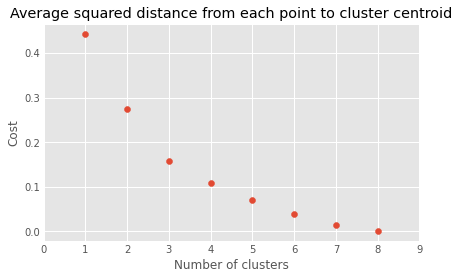

In [231]:
tla_cluster = tla_grouped.drop('TLA', 1)

cost_list=[]
for k in range (1, 9):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    # the default parameters of the KMeans algorithms instruct the algorithm to run 10 times for each number of clusters
    # with different centroid initializations to ensure we avoid local minima
    kmeans_model = KMeans(n_clusters=k, random_state=1, max_iter=600).fit(tla_cluster.iloc[:, :])
    
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    
    # Sum of distances of samples to their closest cluster center
    inertia = kmeans_model.inertia_
    print ("K:",k, "   Cost:", inertia)
    cost_list.append([k,inertia])
        
c_list=pd.DataFrame(cost_list)
c_list.columns=['k', 'cost']

plt.scatter(c_list['k'],c_list['cost'])
plt.title('Average squared distance from each point to cluster centroid')
plt.ylabel('Cost')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(0, 10, step=1))
plt.show()

The result from the elbow method seems ambiguous. We could choose k to be either 3 or 4.  
At this instance we can use the Silhouette Method to ascertain the best k.

In [232]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 7

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(tla_cluster)
  labels = kmeans.labels_
  sil.append(silhouette_score(tla_cluster, labels, metric = 'euclidean'))

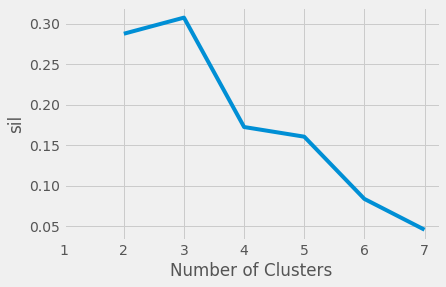

In [233]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 8), sil)
plt.xticks(range(1, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("sil")
plt.show()

The Silhouette Method confirms that the best k (number of clusters) is 3.

#### Cluster the TLA based on the most common venues

In [234]:
# set number of clusters
kclusters = 3
# create map of the Wellington Region using latitude and longitude values
map_region = folium.Map(location=[latitudeGWR, longitudeGWR], zoom_start=9)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tla_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 2, 0, 1, 0, 0], dtype=int32)

In [235]:
# add clustering labels
tla_venues_sorted.insert(2, 'Cluster Labels', kmeans.labels_)


In [236]:
tla_venues_sorted

,TLA,Monthly Bond,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Carterton District,440,1,Café,Winery,Bakery,Restaurant,Grocery Store,Supermarket,Hotel
1,Hutt City,473,0,Café,Indie Movie Theater,Bar,Beach,Park,Seafood Restaurant,Exhibit
2,Kapiti Coast District,479,0,Café,Beach,Grocery Store,Bakery,Burger Joint,Supermarket,Zoo
3,Masterton District,316,2,Café,Supermarket,Modern European Restaurant,Movie Theater,Lake,Bakery,Beach
4,Porirua City,527,0,Café,Burger Joint,Restaurant,Beach,Indie Movie Theater,Park,Zoo
5,South Wairarapa District,433,1,Winery,Café,Grocery Store,Hotel,Tourist Information Center,Racetrack,Resort
6,Upper Hutt City,462,0,Park,Supermarket,Café,Zoo,Scenic Lookout,Motel,Nature Preserve
7,Wellington City,547,0,Coffee Shop,Restaurant,Bar,Brewery,Café,Indie Movie Theater,Italian Restaurant


### Merge all location data and visualize the clusters

Merge all available dataframes

In [237]:
tla_merged = tla_venues_sorted
tla_merged = pd.merge(welly_df2, tla_venues_sorted, on='TLA', how='inner')
tla_merged

,TLA,Land Area(km2),Population,Density(/km2),Latitude,Longitude,Monthly Bond,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Kapiti Coast District,732,57000,77.87,-40.856576,175.193961,479,0,Café,Beach,Grocery Store,Bakery,Burger Joint,Supermarket,Zoo
1,Porirua City,175,61000,348.57,-41.084114,174.930348,527,0,Café,Burger Joint,Restaurant,Beach,Indie Movie Theater,Park,Zoo
2,Upper Hutt City,540,47100,87.22,-41.087868,175.119375,462,0,Park,Supermarket,Café,Zoo,Scenic Lookout,Motel,Nature Preserve
3,Hutt City,376,111800,297.34,-41.212575,174.905763,473,0,Café,Indie Movie Theater,Bar,Beach,Park,Seafood Restaurant,Exhibit
4,Wellington City,290,216200,745.52,-41.252753,174.718471,547,0,Coffee Shop,Restaurant,Bar,Brewery,Café,Indie Movie Theater,Italian Restaurant
5,Masterton District,2300,27500,11.96,-40.934577,175.876852,316,2,Café,Supermarket,Modern European Restaurant,Movie Theater,Lake,Bakery,Beach
6,Carterton District,1180,9960,8.44,-41.053723,175.514724,440,1,Café,Winery,Bakery,Restaurant,Grocery Store,Supermarket,Hotel
7,South Wairarapa District,2387,11400,4.78,-41.267400,175.417743,433,1,Winery,Café,Grocery Store,Hotel,Tourist Information Center,Racetrack,Resort


#### Visualize the clusters using a map of Wellington Region

In [238]:
# create map of the Wellington Region using latitude and longitude values
map_region = folium.Map(location=[latitudeGWR, longitudeGWR], zoom_start=9.5, tiles='Stamen Terrain')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add cluster markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tla_merged['Latitude'], tla_merged['Longitude'], tla_merged['TLA'], tla_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster Labels' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-3],
        fill=True,
        fill_color=rainbow[cluster-3],
        fill_opacity=0.8).add_to(map_region)

map_region

#### Further analysis on clusters

In [239]:
clus0=tla_merged.loc[tla_merged['Cluster Labels'] == 0, tla_merged.columns[[0] + list(range(6, tla_merged.shape[1]))]]
clus0

,TLA,Monthly Bond,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Kapiti Coast District,479,0,Café,Beach,Grocery Store,Bakery,Burger Joint,Supermarket,Zoo
1,Porirua City,527,0,Café,Burger Joint,Restaurant,Beach,Indie Movie Theater,Park,Zoo
2,Upper Hutt City,462,0,Park,Supermarket,Café,Zoo,Scenic Lookout,Motel,Nature Preserve
3,Hutt City,473,0,Café,Indie Movie Theater,Bar,Beach,Park,Seafood Restaurant,Exhibit
4,Wellington City,547,0,Coffee Shop,Restaurant,Bar,Brewery,Café,Indie Movie Theater,Italian Restaurant


In [244]:
for i in range(3,6):
    print(clus0.iloc[:, i].value_counts().iloc[:1])

Café    3
Name: 1st Most Common Venue, dtype: int64
Supermarket    1
Name: 2nd Most Common Venue, dtype: int64
Bar    2
Name: 3rd Most Common Venue, dtype: int64


In [245]:
clus1=tla_merged.loc[tla_merged['Cluster Labels'] == 1, tla_merged.columns[[0] + list(range(6, tla_merged.shape[1]))]]
clus1

,TLA,Monthly Bond,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
6,Carterton District,440,1,Café,Winery,Bakery,Restaurant,Grocery Store,Supermarket,Hotel
7,South Wairarapa District,433,1,Winery,Café,Grocery Store,Hotel,Tourist Information Center,Racetrack,Resort


In [246]:
for i in range(3,6):
    print(clus1.iloc[:, i].value_counts().iloc[:1])

Café    1
Name: 1st Most Common Venue, dtype: int64
Café    1
Name: 2nd Most Common Venue, dtype: int64
Grocery Store    1
Name: 3rd Most Common Venue, dtype: int64


In [247]:
clus2=tla_merged.loc[tla_merged['Cluster Labels'] == 2, tla_merged.columns[[0] + list(range(6, tla_merged.shape[1]))]]
clus2

,TLA,Monthly Bond,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
5,Masterton District,316,2,Café,Supermarket,Modern European Restaurant,Movie Theater,Lake,Bakery,Beach


In [248]:
for i in range(3,6):
    print(clus2.iloc[:, i].value_counts().iloc[:1])

Café    1
Name: 1st Most Common Venue, dtype: int64
Supermarket    1
Name: 2nd Most Common Venue, dtype: int64
Modern European Restaurant    1
Name: 3rd Most Common Venue, dtype: int64


The exploration thus far suggested that the clusters indicated:
1. Urban. In this category, the top 3 venues within 20km radius are cafés, supermarket, and bars.
2. Rural. The top 3 venues within 20km radius include café, winery, and grocery store.
3. Provincial Town category. Here, the top 3 venues within 20km radius are café, supermarket, and a grocery store.

At this stage we can rename the values under Cluster Label and have another close look.

In [250]:
tla_plot = tla_merged
tla_plot.dtypes

TLA                       object
Land Area(km2)            object
Population                 int64
Density(/km2)            float64
Latitude                 float64
Longitude                float64
Monthly Bond               int64
Cluster Labels             int32
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
dtype: object

In [251]:
convert_label = {'Cluster Labels': str, 
               } 
  
tla_plot = tla_plot.astype(convert_label) 
tla_plot.dtypes

TLA                       object
Land Area(km2)            object
Population                 int64
Density(/km2)            float64
Latitude                 float64
Longitude                float64
Monthly Bond               int64
Cluster Labels            object
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
dtype: object

In [252]:
tla_plot["Cluster Labels"].replace({"0": "Urban", "1": "Rural", "2": "Provincial Town"}, inplace=True)
tla_plot

,TLA,Land Area(km2),Population,Density(/km2),Latitude,Longitude,Monthly Bond,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Kapiti Coast District,732,57000,77.87,-40.856576,175.193961,479,Urban,Café,Beach,Grocery Store,Bakery,Burger Joint,Supermarket,Zoo
1,Porirua City,175,61000,348.57,-41.084114,174.930348,527,Urban,Café,Burger Joint,Restaurant,Beach,Indie Movie Theater,Park,Zoo
2,Upper Hutt City,540,47100,87.22,-41.087868,175.119375,462,Urban,Park,Supermarket,Café,Zoo,Scenic Lookout,Motel,Nature Preserve
3,Hutt City,376,111800,297.34,-41.212575,174.905763,473,Urban,Café,Indie Movie Theater,Bar,Beach,Park,Seafood Restaurant,Exhibit
4,Wellington City,290,216200,745.52,-41.252753,174.718471,547,Urban,Coffee Shop,Restaurant,Bar,Brewery,Café,Indie Movie Theater,Italian Restaurant
5,Masterton District,2300,27500,11.96,-40.934577,175.876852,316,Provincial Town,Café,Supermarket,Modern European Restaurant,Movie Theater,Lake,Bakery,Beach
6,Carterton District,1180,9960,8.44,-41.053723,175.514724,440,Rural,Café,Winery,Bakery,Restaurant,Grocery Store,Supermarket,Hotel
7,South Wairarapa District,2387,11400,4.78,-41.267400,175.417743,433,Rural,Winery,Café,Grocery Store,Hotel,Tourist Information Center,Racetrack,Resort


We can observe the cluster labeling of Urban, Provincial Town, and Rural is reflected in the population density.

### Using Visualisation to explore further correlation

#### Import packages

In [269]:
%matplotlib inline
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.style.use('ggplot') # optional: for ggplot-like style
import matplotlib.pyplot as plt
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.3


#### Investigate correlation between population density and rental charges

[[1.         0.72776485]
 [0.72776485 1.        ]]


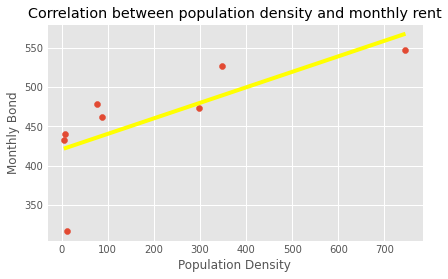

In [254]:
data = tla_plot
x = data['Density(/km2)']
y = data['Monthly Bond']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('Correlation between population density and monthly rent')
plt.xlabel('Population Density')
plt.ylabel('Monthly Bond')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()


The findings show there is reasonable correlation between population density (per square kilometer) and rental charges. Where the density is higher, the rental charges are likely to be higher.

#### Investigate correlation between population and rental charges

[[1.         0.63346266]
 [0.63346266 1.        ]]


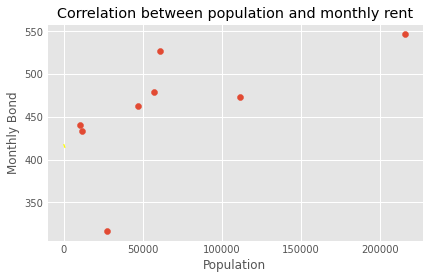

In [257]:
data = tla_plot
x1 = data['Population']
y1 = data['Monthly Bond']

print(np.corrcoef(x1, y1))

plt.scatter(x1, y1) 
plt.title('Correlation between population and monthly rent')
plt.xlabel('Population')
plt.ylabel('Monthly Bond')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x)), color='yellow')
plt.show()

There is less correlation between population numbers alone with rental charges.

## Discussion

The intent of this study was to glean some insights into the residential rental market in the 'macro' scheme of things. The Wellington Region was a good example for this approach because of its variety. It covers busy metro areas as well as provincial towns and rural countryside. Both the elbow and silhouette methods in K-Means Clustering algorithm confirmed this.

There were a number of location factors that were not investigated due to the scope of this study. Future studies can consider other key location factors beyond recreational venues. These may include the availability and rating of schools, medical centres, and other demographics.

The data findings suggested good correlation between population density and residential rental prices. This may seem somewhat counter-intuitive at first, as if someone could rent more space for less money. One may attribute lower rental prices to greater distance from city centre where there is presumably more economic activities and hence, more jobs. However, with the advancement in communications technology, many people can 'work from anywhere' and potentially contribute more to the economy in their localities.

## Conclusion

Perhaps more and fresher thoughts should be given to our approach to spatial and residential planning. If more people feel enabled to 'work from home' then we may see more growth with local businesses, thriving small towns, less traffic and maybe even lower residential prices overall.